In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import ttest_ind

In [105]:
df_price = pd.read_csv('/content/drive/MyDrive/Data Analyst/WCS/Project 4/projet 4 - webscrapping/Amazon_WebScrapping/Price_and_data/price_full_data_webscrap.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
df_original = pd.read_csv('/content/drive/MyDrive/Data Analyst/WCS/Project 4/projet 4 - webscrapping/Dataset clean/Clean_data2.csv')

In [109]:
df_price.shape
df_original.shape

(1009480, 18)

In [110]:
#df_price.columns
df_original.columns

Index(['Unnamed: 0', 'Name', 'pagesNumber', 'Publisher', 'CountsOfReview',
       'PublishYear', 'Authors', 'Rating', 'ISBN', 'Description',
       'Count of text reviews', 'PagesNumber', 'RatingDistTotal_split',
       'RatingDist1_final', 'RatingDist2_final', 'RatingDist3_final',
       'RatingDist4_final', 'RatingDist5_final'],
      dtype='object')

In [111]:
df_complete = df_price.merge(df_original, how='left', left_on='ISBN', right_on='ISBN')

In [112]:
df_complete.shape

(4651, 21)

In [113]:
df_complete.columns

Index(['ISBN', 'result', 'price_paperback', 'price_hardcover', 'Unnamed: 0',
       'Name', 'pagesNumber', 'Publisher', 'CountsOfReview', 'PublishYear',
       'Authors', 'Rating', 'Description', 'Count of text reviews',
       'PagesNumber', 'RatingDistTotal_split', 'RatingDist1_final',
       'RatingDist2_final', 'RatingDist3_final', 'RatingDist4_final',
       'RatingDist5_final'],
      dtype='object')

In [114]:
df_complete = df_complete.drop(['Unnamed: 0', 'pagesNumber'], axis=1)

In [115]:
df_complete.isna().sum()

ISBN                        0
result                      0
price_paperback           775
price_hardcover          1834
Name                        0
Publisher                  67
CountsOfReview              0
PublishYear                 0
Authors                     0
Rating                      0
Description               272
Count of text reviews    4651
PagesNumber                 0
RatingDistTotal_split       0
RatingDist1_final           0
RatingDist2_final           0
RatingDist3_final           0
RatingDist4_final           0
RatingDist5_final           0
dtype: int64

In [116]:
df_complete.describe()

,price_paperback,price_hardcover,CountsOfReview,PublishYear,Rating,Count of text reviews,PagesNumber,RatingDistTotal_split,RatingDist1_final,RatingDist2_final,RatingDist3_final,RatingDist4_final,RatingDist5_final
count,3876.000000,2817.000000,4651.000000,4651.000000,4651.000000,0.0,4651.000000,4.651000e+03,4651.000000,4651.000000,4651.000000,4.651000e+03,4.651000e+03
mean,15.802190,25.269365,45.906902,2003.369813,3.932309,NaN,293.267254,3.712600e+04,765.374973,1741.880026,6597.075683,1.180237e+04,1.621930e+04
std,24.342695,36.150995,591.058623,264.768342,0.262861,NaN,198.603571,2.127765e+05,4701.112259,8561.706015,29704.001062,5.979878e+04,1.192290e+05
min,0.010000,0.010000,0.000000,1900.000000,2.390000,NaN,0.000000,5.010000e+02,0.000000,4.000000,42.000000,8.500000e+01,3.800000e+01
25%,7.567500,10.150000,0.000000,1994.000000,3.780000,NaN,176.000000,1.037500e+03,17.000000,57.000000,242.000000,3.610000e+02,3.290000e+02
50%,11.280000,16.550000,1.000000,2003.000000,3.940000,NaN,275.000000,2.657000e+03,43.000000,142.000000,613.000000,9.090000e+02,8.830000e+02
75%,16.990000,27.050000,7.000000,2007.000000,4.110000,NaN,384.000000,9.615000e+03,158.000000,519.500000,2173.500000,3.382500e+03,3.313000e+03
max,800.000000,652.280000,25317.000000,20015.000000,4.760000,NaN,2098.000000,6.865910e+06,116622.000000,181872.000000,586963.000000,1.571879e+06,4.457890e+06


In [117]:
df_complete[['price_paperback', 'price_hardcover']].value_counts()

price_paperback  price_hardcover
6.99             4.95               5
9.99             29.95              4
7.99             17.99              4
                 4.95               4
9.56             24.00              3
                                   ..
9.07             6.10               1
                 13.93              1
                 36.03              1
9.08             13.38              1
800.00           19.95              1
Length: 2495, dtype: int64

In [118]:
df_complete_WOna = df_complete.dropna(subset=('price_paperback', 'price_hardcover'))

In [119]:
df_complete_WOna.shape

(2613, 19)

In [120]:
print(4651-2613)

2038


In [121]:
print(*df_complete_WOna[df_complete_WOna['ISBN']=='1857825225']['result'])

(['  Kindle  \n $7.99  \n   \n  \n\n                                    Read with Our  Free App  \n\n    ', '  Hardcover  \n $35.00  \n\n\n   \n     8 Used from $9.81         1 New from $35.00      ', '  Paperback  \n $0.01  \n\n\n   \n     11 Used from $0.01      '], '1857825225')


In [122]:
df_complete_WOna.sort_values(['price_paperback'], axis = 0, ascending = True)

,ISBN,result,price_paperback,price_hardcover,Name,Publisher,CountsOfReview,PublishYear,Authors,Rating,Description,Count of text reviews,PagesNumber,RatingDistTotal_split,RatingDist1_final,RatingDist2_final,RatingDist3_final,RatingDist4_final,RatingDist5_final
2093,1857825225,([' Kindle \n $7.99 \n \n \n\n ...,0.01,35.00,Bronson,John Blake,1,2006,Charles Bronson,3.87,Charles Bronson has spent 24 of the last 28 ye...,NaN,304.0,844,15,66,199,298,266
2015,0786209542,([' Kindle \n $6.99 \n \n \n\n ...,0.87,35.25,Marrying Mom,Thorndike Press,1,1997,Olivia Goldsmith,3.25,"Wanted!A gentleman of means, neither young nor...",NaN,299.0,765,45,116,310,191,103
4591,0600204219,([' Hardcover \n $0.01 \n\n\n \n 11 U...,1.03,0.01,Naughty Amelia Jane!,Dean & Sons,0,1939,Enid Blyton,3.87,Meet Amelia Jane! She's big! She'd bad! She's ...,NaN,186.0,1475,17,98,440,430,490
855,2266043242,([' Kindle \n $0.00 \n \n \n\n ...,1.46,24.95,Gargantua,Presses Pocket,0,1992,François Rabelais,3.49,NaN,NaN,485.0,2883,196,380,813,817,677
1768,0385487320,([' Kindle \n $0.19 \n \n \n\n ...,1.49,25.30,Frankenstein (New York Public Library Collecto...,Doubleday,9,1999,Mary Wollstonecraft Shelley,3.81,"<i>Frankenstein,</i> loved by many decades of ...",NaN,316.0,1146636,35443,88306,284229,393996,344662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0531095207,([' \n\n\n \n Audiobook \n \n\n $0.00 \...,298.99,4.95,"Lord Kirkle's Money (Beyond the Western Sea, B...",Scholastic,1,1996,Avi,3.89,The second book in the thrilling emigrant adve...,NaN,380.0,527,7,31,130,202,157
4136,3442546370,([' Kindle \n $9.99 \n \n \n\n ...,334.00,10.33,"Kalt erwischt (Stephanie Plum, #12)",Manhattan,1,2008,Janet Evanovich,4.15,Stephanie Plum ist vom Leben überfordert. Nich...,NaN,304.0,89157,292,1926,17054,34722,35163
2067,0595440096,([' Kindle \n $12.99 \n \n \n\n ...,370.23,34.95,Still Alice,iUniverse,23874,2007,Lisa Genova,4.32,<i>Still Alice</i> is a compelling debut novel...,NaN,292.0,294236,1343,4723,33157,115495,139518
2779,0393958078,([' Hardcover \n $24.72 \n\n\n \n 26 ...,461.91,24.72,The Study of Orchestration,W. W. Norton & Company,1,1989,Samuel Adler,4.32,The new Third Edition retains the elements tha...,NaN,640.0,560,8,18,58,177,299


In [ ]:
#create csv of the table
df_complete_WOna.to_csv('df_complete_WOna.csv')

# TEST EDA / PLOTS without the NaNs

In [123]:
# correlation?
df_complete_WOna.corr()

,price_paperback,price_hardcover,CountsOfReview,PublishYear,Rating,Count of text reviews,PagesNumber,RatingDistTotal_split,RatingDist1_final,RatingDist2_final,RatingDist3_final,RatingDist4_final,RatingDist5_final
price_paperback,1.000000,0.046908,0.165671,-0.002397,0.052173,NaN,0.066270,-0.016045,-0.021482,-0.026757,-0.024497,-0.014478,-0.012042
price_hardcover,0.046908,1.000000,-0.012162,-0.090108,0.078526,NaN,0.026572,-0.000062,0.000996,-0.002785,-0.002971,-0.000445,0.001148
CountsOfReview,0.165671,-0.012162,1.000000,0.065273,0.037282,NaN,0.018000,0.067193,0.038726,0.047619,0.063565,0.085008,0.055004
PublishYear,-0.002397,-0.090108,0.065273,1.000000,-0.072809,NaN,0.053511,0.011344,0.011911,0.015672,0.013552,0.013342,0.008246
Rating,0.052173,0.078526,0.037282,-0.072809,1.000000,NaN,0.114525,0.139343,0.043874,0.038912,0.081653,0.132984,0.158112
Count of text reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PagesNumber,0.066270,0.026572,0.018000,0.053511,0.114525,NaN,1.000000,0.028746,0.034482,0.020712,0.015540,0.026988,0.031280
RatingDistTotal_split,-0.016045,-0.000062,0.067193,0.011344,0.139343,NaN,0.028746,1.000000,0.789957,0.811744,0.909393,0.987928,0.965351
RatingDist1_final,-0.021482,0.000996,0.038726,0.011911,0.043874,NaN,0.034482,0.789957,1.000000,0.979735,0.933477,0.850242,0.622794
RatingDist2_final,-0.026757,-0.002785,0.047619,0.015672,0.038912,NaN,0.020712,0.811744,0.979735,1.000000,0.971032,0.877285,0.636990


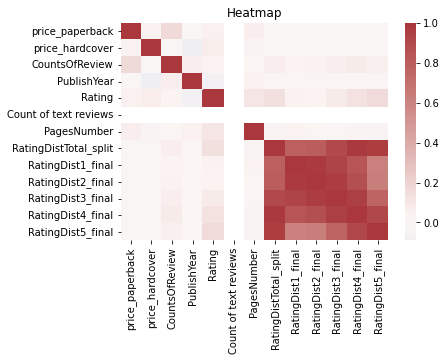

In [ ]:
fig = sns.heatmap(df_complete_WOna.corr (), cmap='vlag', center=0)
fig.set(title = "Heatmap")
plt.show()

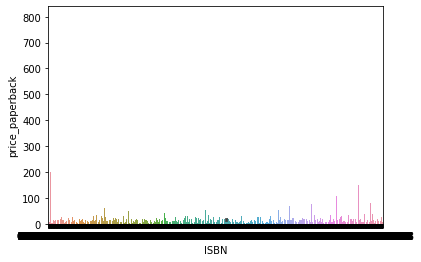

In [ ]:
sns.barplot(data=df_complete_WOna, x='ISBN', y='price_paperback')

In [124]:
df_complete_WOna.columns

Index(['ISBN', 'result', 'price_paperback', 'price_hardcover', 'Name',
       'Publisher', 'CountsOfReview', 'PublishYear', 'Authors', 'Rating',
       'Description', 'Count of text reviews', 'PagesNumber',
       'RatingDistTotal_split', 'RatingDist1_final', 'RatingDist2_final',
       'RatingDist3_final', 'RatingDist4_final', 'RatingDist5_final'],
      dtype='object')

Text(0.5, 1.0, 'Prices paperback distribution')

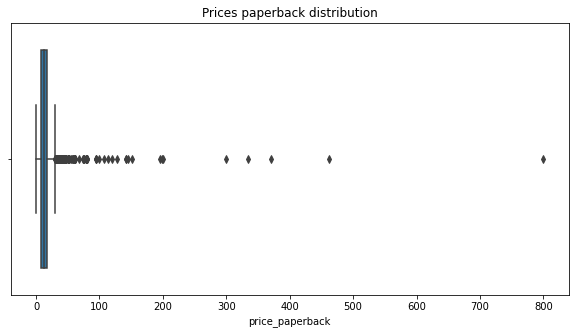

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = df_complete_WOna[df_complete_WOna['price_paperback'] > 0], x='price_paperback')
#ax.set_xticks(np.arange(0, 10, 1))
ax.set_title("Prices paperback distribution")

In [ ]:
df_complete_WOna['price_paperback'].quantile([0.25, 0.50, 0.75])

0.25     7.99
0.50    11.99
0.75    16.99
Name: price_paperback, dtype: float64

Text(0.5, 1.0, 'Prices hardcover distribution')

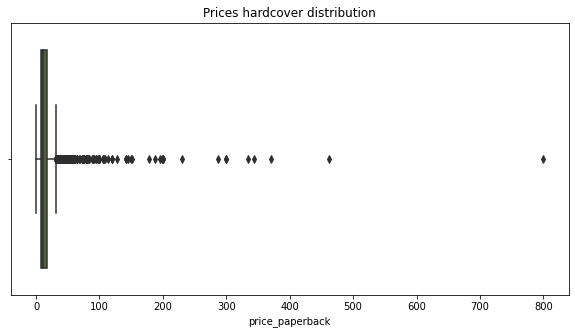

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = df_complete, x='price_paperback', color='darkolivegreen')
ax.set_title("Prices hardcover distribution")

Text(0.5, 1.0, 'Prices hardcover distribution')

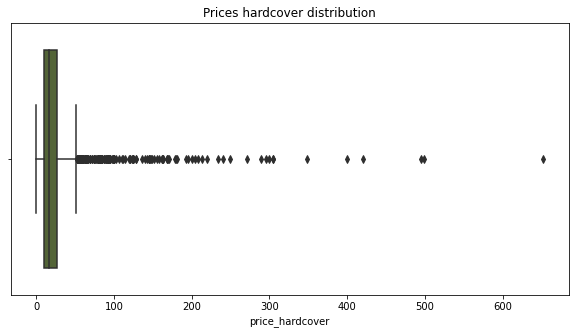

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = df_complete_WOna[df_complete_WOna['price_hardcover'] > 0], x='price_hardcover', color='darkolivegreen')
ax.set_title("Prices hardcover distribution")

In [ ]:
df_complete_WOna['price_hardcover'].quantile([0.25, 0.50, 0.75])

0.25    10.12
0.50    16.45
0.75    26.95
Name: price_hardcover, dtype: float64

Text(0.5, 1.0, 'Prices hardcover distribution')

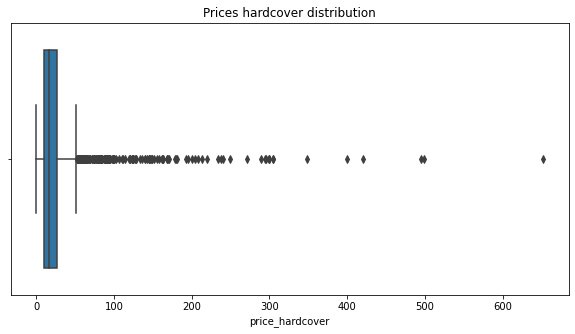

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = df_complete, x='price_hardcover')
ax.set_title("Prices hardcover distribution")

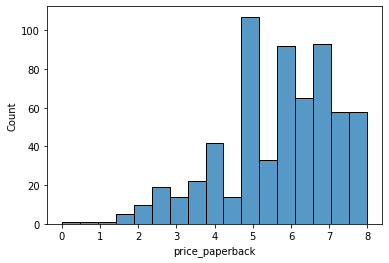

In [ ]:
#do histogram for the prices

#paperback
sns.histplot(data = df_complete_WOna[df_complete_WOna['price_paperback'] < df_complete_WOna['price_paperback'].quantile(0.25)], x='price_paperback')
# plt.xlim([0, 800])

In [ ]:
df_complete_WOna_filter = df_complete_WOna[df_complete_WOna['price_paperback'] < 5]
df_complete_WOna_filter.sort_values(by = 'Rating').head(5)

,ISBN,result,price_paperback,price_hardcover,Name,Publisher,CountsOfReview,PublishYear,Authors,Rating,Description,Count of text reviews,PagesNumber,RatingDistTotal_split,RatingDist1_final,RatingDist2_final,RatingDist3_final,RatingDist4_final,RatingDist5_final,good_bad
2647,0752803603,([' Hardcover \n $21.34 \n\n\n \n 51 ...,3.69,21.34,"The Edge of Human (Blade Runner, #2)",Orion,3,1996,K.W. Jeter,3.09,"<b>Set in a futuristic urban jungle, Ridley Sc...",NaN,384.0,900,74,179,344,202,101,bad
1452,0575071818,([' Kindle \n $2.99 \n \n \n\n ...,3.95,9.81,The Snow,Gollancz,1,2004,Adam Roberts,3.23,The snow doesn't stop. It falls and falls and ...,NaN,297.0,512,44,83,163,156,66,bad
1971,0143114239,([' Kindle \n $10.99 \n \n \n\n ...,4.95,21.00,Beethoven Was One-Sixteenth Black and Other St...,Penguin Books,6,2008,Nadine Gordimer,3.24,"Always exploring the boundaries of race, ident...",NaN,192.0,522,24,90,194,166,48,bad
2015,0786209542,([' Kindle \n $6.99 \n \n \n\n ...,0.87,35.25,Marrying Mom,Thorndike Press,1,1997,Olivia Goldsmith,3.25,"Wanted!A gentleman of means, neither young nor...",NaN,299.0,765,45,116,310,191,103,bad
1967,014314183X,([' Kindle \n $11.99 \n \n \n\n ...,3.46,13.73,The Mistress's Daughter,Penguin Audio,9,2007,A.M. Homes,3.28,"Unabridged CDs - 5 CDs, 6 hours <br /><br /> A...",NaN,6.0,3888,150,614,1548,1130,446,bad


(0.0, 800.0)

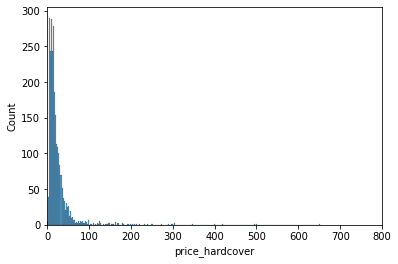

In [ ]:
#do histogram for the prices

#hardcover
sns.histplot(data = df_complete_WOna, x='price_hardcover')
plt.xlim([0, 800])

In [ ]:
# conclusion : much more outliers on the Hardcover prices 

Text(0.5, 1.0, 'Price vs rating')

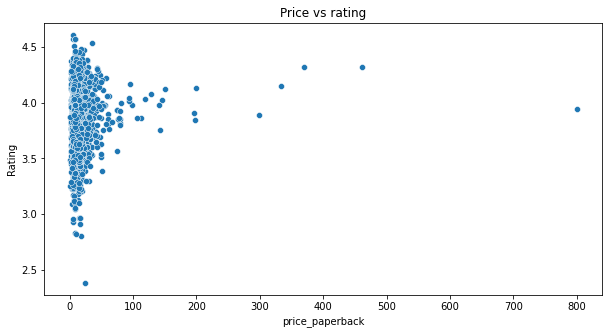

In [ ]:
# Relation between rating and price ? 
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(data = df_complete_WOna, x='price_paperback', y='Rating')
ax.set_title("Price vs rating")

In [ ]:
#Questions to reply to:
#- Relation between ratings in goodreads and price in Amazon
#- price / time ? Find the lowest price with the most rating 


In [ ]:
#Marta: tying to remove the outliers for the corr analysis
## Price paperback
df_complete_WOna['price_paperback'].quantile([.25, .5, .75])

0.25     7.99
0.50    11.99
0.75    16.99
Name: price_paperback, dtype: float64

In [ ]:
Q1 = 7.99
Q3 = 16.99
#IQR = Q3 - Q1 = 16.99-7.99 = 9
IQR = 9
Outliers = Q3+1.5*IQR
print('Outliers of the paperpback price are above: ', Outliers)

Outliers of the paperpback price are above:  30.49


In [ ]:
##Price hardcover
df_complete_WOna['price_hardcover'].quantile([.25, .5, .75])

0.25    10.12
0.50    16.45
0.75    26.95
Name: price_hardcover, dtype: float64

In [ ]:
Q1 = 10.12
Q3 = 26.95
#IQR = Q3 - Q1 = 26.95-10.12 = 16.83
IQR = 16.83
Outliers = Q3+1.5*IQR
print('Outliers of the hardcover price are above: ', Outliers)

Outliers of the hardcover price are above:  52.19499999999999


Text(0.5, 1.0, 'Price vs rating')

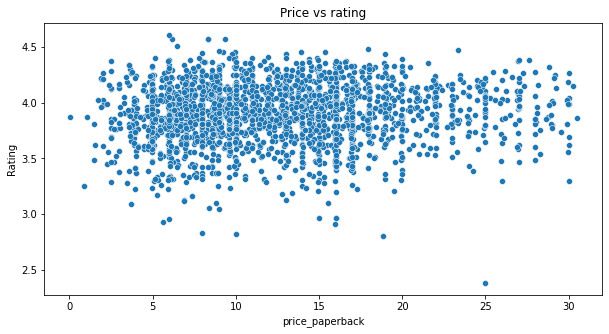

In [ ]:
# Price paperback - Relation between rating and price without outliers? 
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(data = df_complete_WOna[df_complete_WOna['price_paperback'] <= 30.49], x='price_paperback', y='Rating')
ax.set_title("Price vs rating")

#There is no relactionship

Text(0.5, 1.0, 'Price vs rating')

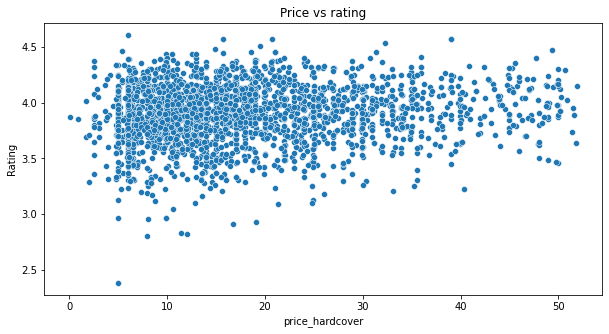

In [ ]:
# Price Hardcover - Relation between rating and price without outliers? 
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(data = df_complete_WOna[df_complete_WOna['price_hardcover'] <= 52.20], x='price_hardcover', y='Rating')
ax.set_title("Price vs rating")

#There is no relactionship

In [125]:
#Hypothesis testing: 2 independent variables
#categorical variable (good/bad)
#quantitativa variable (price)

#determine the 2nd quantile

#categorical variable (good/bad)
df_complete_WOna['Rating'] = df_complete_WOna['Rating'].astype(float)
df_complete_WOna['good_bad'] = df_complete_WOna['Rating'].apply(lambda x : 'good' if x >= 3.9 else 'bad')


#divide in two groups
df_paperback_good = df_complete_WOna[df_complete_WOna['good_bad'] == 'good']['price_paperback']
df_paperback_bad = df_complete_WOna[df_complete_WOna['good_bad'] == 'bad']['price_paperback']

# apply the t-student test to two independent variables
# Is the price of good books equal to price of bad books?

print(df_complete_WOna[df_complete_WOna['good_bad'] == 'good']['price_paperback'].shape[0])
print(df_complete_WOna[df_complete_WOna['good_bad'] == 'bad']['price_paperback'].shape[0])

1410
1203


<ipython-input-125-adee424b0459>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_WOna['Rating'] = df_complete_WOna['Rating'].astype(float)
<ipython-input-125-adee424b0459>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_WOna['good_bad'] = df_complete_WOna['Rating'].apply(lambda x : 'good' if x >= 3.9 else 'bad')


In [126]:
df_paperback_bad.shape

(1203,)

In [127]:
df_paperback_good.shape

(1410,)

In [ ]:
df_complete_WOna.describe()

,price_paperback,price_hardcover,CountsOfReview,PublishYear,Rating,Count of text reviews,PagesNumber,RatingDistTotal_split,RatingDist1_final,RatingDist2_final,RatingDist3_final,RatingDist4_final,RatingDist5_final
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,0.0,2613.000000,2.613000e+03,2613.000000,2613.000000,2613.000000,2613.000000,2.613000e+03
mean,15.470310,24.731359,61.225029,1999.011864,3.905511,NaN,299.082281,3.199674e+04,610.207807,1495.307692,5825.499426,10391.830463,1.367389e+04
std,24.716374,35.372395,772.008954,10.457795,0.255730,NaN,193.992107,1.702150e+05,3440.722585,7182.536312,25834.085458,50389.567538,9.156462e+04
min,0.010000,0.010000,0.000000,1937.000000,2.390000,NaN,0.000000,5.010000e+02,0.000000,5.000000,58.000000,100.000000,3.800000e+01
25%,7.990000,10.120000,0.000000,1993.000000,3.760000,NaN,184.000000,1.041000e+03,17.000000,59.000000,254.000000,366.000000,3.130000e+02
50%,11.990000,16.450000,2.000000,2003.000000,3.920000,NaN,290.000000,2.603000e+03,43.000000,143.000000,627.000000,903.000000,8.070000e+02
75%,16.990000,26.950000,7.000000,2007.000000,4.090000,NaN,400.000000,8.351000e+03,142.000000,461.000000,1967.000000,3094.000000,2.791000e+03
max,800.000000,652.280000,25317.000000,2019.000000,4.600000,NaN,2098.000000,2.774928e+06,78651.000000,148455.000000,468764.000000,851216.000000,1.870610e+06


In [ ]:
from scipy.stats import iqr
#3Q+1.5*IQR -> outlier limit
print(df_complete_WOna['PagesNumber'].quantile([0.25, 0.5, 0.75]))
print(iqr(df_complete_WOna['PagesNumber']))
limit=400+216
print(limit)

0.25    184.0
0.50    290.0
0.75    400.0
Name: PagesNumber, dtype: float64
216.0
616


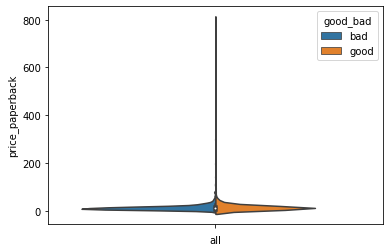

In [129]:
condition = df_complete_WOna['price_paperback'] < 1000
df_complete_WOna_50 = df_complete_WOna.loc[condition, :]
df_complete_WOna_50['all'] = ""

sns.violinplot(data=df_complete_WOna_50, y='price_paperback', x='all', hue='good_bad', split=True)

#proofs the hypothesis tests of th egood and bad

In [ ]:
df_complete_WOna_200

,ISBN,result,price_paperback,price_hardcover,Name,Publisher,CountsOfReview,PublishYear,Authors,Rating,Description,Count of text reviews,PagesNumber,RatingDistTotal_split,RatingDist1_final,RatingDist2_final,RatingDist3_final,RatingDist4_final,RatingDist5_final,good_bad
3,0399149147,([' Kindle \n $8.99 \n \n \n\n ...,18.06,1.65,Red Rabbit (Jack Ryan Universe #3; Jack Ryan #2),Putnam Adult,9,2002,Tom Clancy,3.69,"Tom Clancy returns to Jack Ryan's early days, ...",NaN,640.0,27896,817,2426,8043,9782,6828,bad
5,0859974669,([' Kindle \n $0.39 \n \n \n\n ...,3.99,4.95,A room with a view,Chivers,0,1980,E.M. Forster,3.91,"""But you do,"" he went on, not waiting for cont...",NaN,338.0,151251,2824,8944,35712,55777,47994,good
6,0671017411,([' Kindle \n $7.99 \n \n \n\n ...,13.93,16.18,Come the Spring,Pocket Books,2,1999,Julie Garwood,3.97,"Adam, Douglas and Travis Clayborne are each ha...",NaN,353.0,8076,113,418,1975,2644,2926,good
7,0449147770,([' Kindle \n $5.97 \n \n \n\n ...,8.99,9.80,"Flying Too High (Phryne Fisher, #2)",Fawcett,0,1992,Kerry Greenwood,3.86,"Phryne Fisher has her hands full in this, her ...",NaN,147.0,10362,50,408,2937,4475,2492,bad
8,0140052771,([' Hardcover \n $74.99 \n\n\n \n 4 U...,12.35,74.99,Ashes and Diamonds,Penguin Books,4,1980,Jerzy Andrzejewski,3.66,Ashes and Diamonds takes us to a provincial to...,NaN,256.0,635,13,54,191,256,121,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,0192832298,([' Kindle \n $0.00 \n \n \n\n ...,10.50,14.98,Huntingtower,Oxford University Press,1,1997,John Buchan,3.86,This modern fairy-tale is also the gripping ad...,NaN,229.0,628,12,32,164,243,177,bad
4643,0374225788,([' Kindle \n $10.99 \n \n \n\n ...,17.00,6.06,The Old Gringo,"Farrar, Straus and Giroux",2,1985,Carlos Fuentes,3.51,"In <i>The Old Gringo,</i> Carlos Fuentes bring...",NaN,208.0,2765,71,342,929,945,478,bad
4644,0060250771,([' Hardcover \n $6.10 \n\n\n \n 19 U...,6.99,6.10,After the Dancing Days,HarperCollins Publishers,3,1986,Margaret I. Rostkowski,3.89,<b>Is War A Thing To Be Forgotten?</b><br />Th...,NaN,217.0,998,20,59,236,379,304,bad
4645,0671651366,([' Kindle \n $0.99 \n \n \n\n ...,5.99,21.80,Bambi,Simon & Schuster,1,1970,Felix Salten,4.12,Describes the life of a deer in the forest as ...,NaN,190.0,32987,612,1669,6364,8970,15372,good


In [ ]:
df_complete_WOna_200['good_bad']

3        bad
5       good
6       good
7        bad
8        bad
        ... 
4640     bad
4643     bad
4644     bad
4645    good
4647     bad
Name: good_bad, Length: 2566, dtype: object

In [128]:
alpha = 0.05
ttest_ind(df_paperback_good, df_paperback_bad) # pvalue<0,05

Ttest_indResult(statistic=2.4064921925915153, pvalue=0.016175601267926516)

In [ ]:
#years (prices before or after 2008)


In [ ]:
#Hypothesis testing: 2 independent variables
#categorical variable (before 2008/after 2008)
#quantitativa variable (price)

#which are the outliers


#categorical variable (before 2008/after 2008)
df_complete_WOna['before_after_2008'] = df_complete_WOna['PublishYear'].apply(lambda x : 'after' if x >= 2008 else 'before')
df_complete_WOna

#divide in two groups
whole_df_paperback_before = df_complete_WOna[df_complete_WOna['before_after_2008'] == 'before'] #) & (df_complete_WOna['price_paperback'] < 800)]
df_paperback_after = df_complete_WOna[df_complete_WOna['before_after_2008'] == 'after']['price_paperback']
sample_whole_df_paperback_before = whole_df_paperback_before.sample(df_paperback_after.shape[0], random_state = 27)
df_paperback_before = sample_whole_df_paperback_before[sample_whole_df_paperback_before['before_after_2008'] == 'before']['price_paperback']


# apply the t-student test to two independent variables
# Is the price after 2008 different than before?

print(df_paperback_before.shape[0])
print(df_paperback_after.shape[0])

625
625


<ipython-input-18-05b163f889be>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_WOna['before_after_2008'] = df_complete_WOna['PublishYear'].apply(lambda x : 'after' if x >= 2008 else 'before')


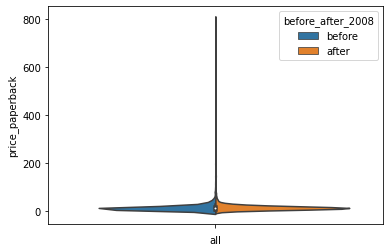

In [ ]:
condition = df_complete_WOna['price_paperback'] < 1000
df_complete_WOna_limit = df_complete_WOna.loc[condition, :]
df_complete_WOna_limit['all'] = ""

sns.violinplot(data=df_complete_WOna_limit, y='price_paperback', x='all', hue='before_after_2008', split=True)

#proofs the hypothesis tests of the before and after 2008

In [ ]:
alpha = 0.05
ttest_ind(df_paperback_before, df_paperback_after) # pvalue>0.05 we dont reject the null hypothesis

Ttest_indResult(statistic=-0.2571004691375858, pvalue=0.7971435960131729)

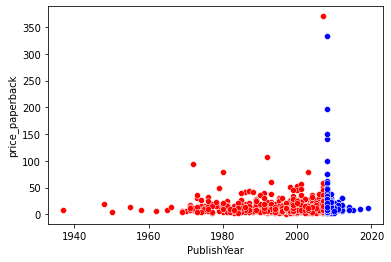

In [ ]:
sns.scatterplot(data = sample_whole_df_paperback_before, x = 'PublishYear', y ='price_paperback', color = 'red')
sns.scatterplot(data = df_complete_WOna[df_complete_WOna['before_after_2008'] == 'after'], x = 'PublishYear', y ='price_paperback', color = 'blue')


In [ ]:
df_paperback_before.mean()

14.736976

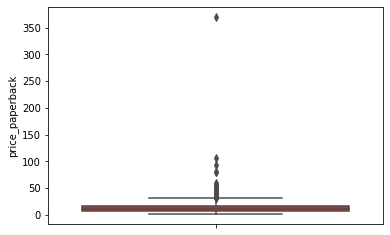

In [ ]:
sns.boxplot(data = df_paperback_before, y = df_paperback_before.index, color = 'red')

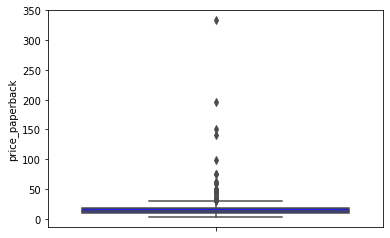

In [ ]:
sns.boxplot(data = df_paperback_after, y = df_paperback_after.index, color = 'blue')

In [ ]:
df_paperback_after.mean()

16.237215999999997

In [ ]:
print(df_complete_WOna[df_complete_WOna['before_after_2008'] == 'before']['PublishYear'].min())
print(df_complete_WOna[df_complete_WOna['before_after_2008'] == 'before']['PublishYear'].max())

1937
2007


In [ ]:
print(df_complete_WOna[df_complete_WOna['before_after_2008'] == 'after']['PublishYear'].min())
print(df_complete_WOna[df_complete_WOna['before_after_2008'] == 'after']['PublishYear'].max())

2008
2019


0.25    184.0
0.50    290.0
0.75    400.0
Name: PagesNumber, dtype: float64
Size more pages: 1308
Size less pages: 1198


<ipython-input-201-994fb5ddd284>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_WOna['more_less_pages'] = df_complete_WOna['PagesNumber'].apply(lambda x : 'more' if x >= 290 else 'less')


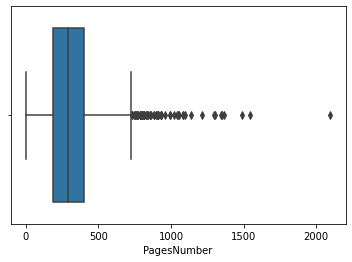

In [ ]:
##pages for this set of data (can we use?)
#Hypothesis testing: 2 independent variables
#categorical variable (number of pages/number of pages)
#quantitativa variable (price)

#determine the 2nd quantile
print(df_complete_WOna['PagesNumber'].quantile([0.25, 0.5, 0.75]))
sns.boxplot(data = df_complete_WOna['PagesNumber'], x = df_complete_WOna['PagesNumber'].index)

#categorical variable (before 2008/after 2008)
df_complete_WOna['more_less_pages'] = df_complete_WOna['PagesNumber'].apply(lambda x : 'more' if x >= 290 else 'less')
df_complete_WOna

#divide in two groups
df_paperback_more_pages = df_complete_WOna[(df_complete_WOna['more_less_pages'] == 'more') & (df_complete_WOna['PagesNumber'] > 0)]['price_paperback']
df_paperback_less_pages = df_complete_WOna[(df_complete_WOna['more_less_pages'] == 'less') & (df_complete_WOna['PagesNumber'] > 0)]['price_paperback']

print('Size more pages:', df_paperback_more_pages.shape[0])
print('Size less pages:',df_paperback_less_pages.shape[0])

In [ ]:
# apply the t-student test to two independent variables
# Is the price of more pages different than less pages?

alpha = 0.05
ttest_ind(df_paperback_more_pages, df_paperback_less_pages) # pvalue<0.05 we reject tha fact that they are the same

Ttest_indResult(statistic=2.7350929845472094, pvalue=0.006280212925447661)

In [ ]:
print(df_complete_WOna['price_paperback'].min())
print(df_complete_WOna['price_paperback'].max())

0.01
800.0


In [ ]:
df_complete_WOna['price_paperback']


3       18.06
5        3.99
6       13.93
7        8.99
8       12.35
        ...  
4640    10.50
4643    17.00
4644     6.99
4645     5.99
4647    23.95
Name: price_paperback, Length: 2613, dtype: float64